<h1><center> Python Challenge </center></h1>
<h3><center> Cristian Lazo Quispe </center></h3>

---

# Problem

A famous casino suddenly faces a huge decline in its revenue. So the casino decides to offer
a new Poker online version. Can you help them write an algorithm to ranking the Poker
hands

# Rules

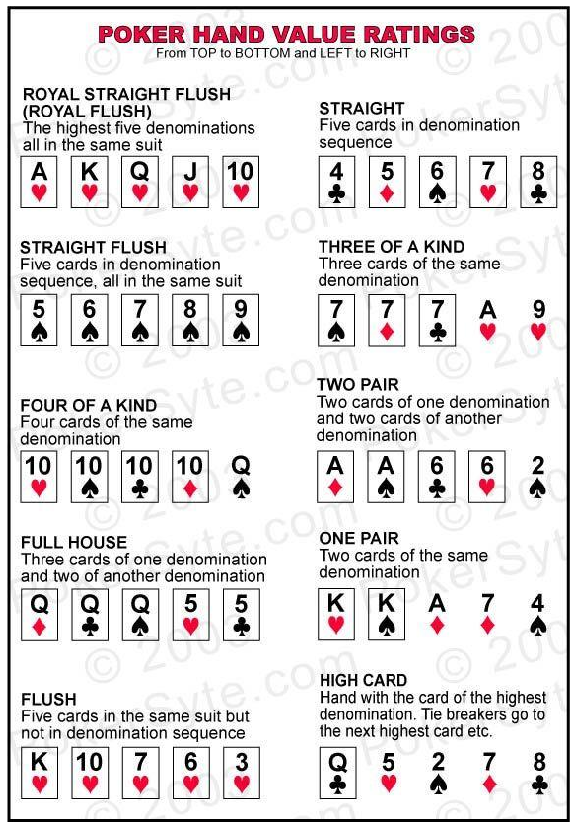

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.rcParams['figure.figsize'] = [30,15]

plt.imshow(plt.imread('rules.png'))
plt.axis('off')
plt.show()

# Solution

In [98]:
# Author: Cristian Lazo Quispe
# gmail : clazoq@uni.pe


import numpy as np

class PokerHand:
    def __init__(self,hand):
        
        self.check_size(hand) # validation of number's cars
        self.check_hand(hand) # validation of the right format        
        self.hand = hand
        self.numbers = self.to_numeric([a[:-1] for a in hand.split()]) # get first character       
        self.symbols = [a[-1] for a in hand.split()] # get second character
        self.sum_hand = sum(self.numbers) # get sum of first characters
        self.rating = self.get_rating(hand) # get rating of hand

    
    def check_size(self,hand):
        if(len(hand.split())!=5):
            raise Exception("Incorrect number's cars: %s, expected 5 cards" % len(hand.split()))
            
    def check_card(self,card):       
        return card[0] in self.first and card[1] in self.second
    
    def check_hand(self,hand):
        self.first  = [str(i) for i in range(2,10)]+['T','J','Q','K','A']
        self.second = ['S','H','D','C']
        for card in hand.split():
            if(not self.check_card(card)):
                raise Exception(' Incorrect format of car : %s' % (card))
    
    def get_rating(self,hand):
        
        difference = max(self.numbers)-min(self.numbers)
        values, counts = np.unique(self.numbers, return_counts=True)
        flush = len(set(self.symbols)) == 1 # all elements are in same symbol
        sequence = (difference == 4 or difference == 12) and len(values)==5
        straight = self.sum_hand == 60 and len(values)==5 # max sum

        if (straight and flush):
            return 10
        elif (sequence and flush):
            return 9
        elif (max(counts)>=4):
            return 8
        elif len(values)==2: # 2 groups
            if counts[0]*counts[1]==6: # groups of 3 and 2 elements
                return 7
        elif(flush):
            return 6
        elif(sequence):
            return 5
        elif(max(counts)==3): # three card of same denomination
            return 4
        elif len(values)==3: # three groups
            if counts[0]*counts[1]*counts[2] == 4: # groups of 2,2 and 1 elements 
                return 3
        elif len(values)== 4:
            return 2
        
        return max(self.numbers)/14
    
    def to_numeric(self,characters_hand):
        dict_values = dict((r,i) for i,r in enumerate('..23456789TJQKA'))
        dict_values['10']=10
        return list(map(dict_values.get, characters_hand))

    def compare_with(self,second_hand):
        try:
            hand_2 = second_hand.hand
        except:
            raise Exception(' Incorrect input : Expected object PokerHand')
        diff = self.rating - second_hand.rating
        if (diff==0):
            return (self.sum_hand-second_hand.sum_hand)>0
        else:
            return diff>0
        


In [99]:
print(PokerHand("KS 2H 5C JD TD").compare_with(PokerHand("9C 9H 5C 5H AC")))
print(PokerHand("9C 9H 5C 5H AC").compare_with(PokerHand("9C 9H 5C 5H AC")))


False
False


# Evaluation

In [100]:
class results:
    def __init__(self):
        self.WIN = True
        self.LOSS = False
        
class evaluate:
    def __init__(self):
        Result = results()
        self.assertTrue(PokerHand("TC TH 5C 5H KH").compare_with(PokerHand("9C 9H 5C 5H AC")) == Result.WIN)
        self.assertTrue(PokerHand("TS TD KC JC 7C").compare_with(PokerHand("JS JC AS KC TD")) == Result.LOSS)
        self.assertTrue(PokerHand("7H 7C QC JS TS").compare_with(PokerHand("7D 7C JS TS 6D")) == Result.WIN)
        self.assertTrue(PokerHand("5S 5D 8C 7S 6H").compare_with(PokerHand("7D 7S 5S 5D JS")) == Result.LOSS)
        self.assertTrue(PokerHand("AS AD KD 7C 3D").compare_with(PokerHand("AD AH KD 7C 4S")) == Result.LOSS)
        self.assertTrue(PokerHand("TS JS QS KS AS").compare_with(PokerHand("AC AH AS AS KS")) == Result.WIN)
        self.assertTrue(PokerHand("TS JS QS KS AS").compare_with(PokerHand("TC JS QC KS AC")) == Result.WIN)
        self.assertTrue(PokerHand("TS JS QS KS AS").compare_with(PokerHand("QH QS QC AS 8H")) == Result.WIN)
        self.assertTrue(PokerHand("AC AH AS AS KS").compare_with(PokerHand("TC JS QC KS AC")) == Result.WIN)
        self.assertTrue(PokerHand("AC AH AS AS KS").compare_with(PokerHand("QH QS QC AS 8H")) == Result.WIN)
        self.assertTrue(PokerHand("TC JS QC KS AC").compare_with(PokerHand("QH QS QC AS 8H")) == Result.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("JH JC JS JD TH")) == Result.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("4H 5H 9H TH JH")) == Result.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("7C 8S 9H TH JH")) == Result.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("TS TH TD JH JD")) == Result.WIN)
        self.assertTrue(PokerHand("7H 8H 9H TH JH").compare_with(PokerHand("JH JD TH TC 4C")) == Result.WIN)
        self.assertTrue(PokerHand("JH JC JS JD TH").compare_with(PokerHand("4H 5H 9H TH JH")) == Result.WIN)

    def assertTrue(self,result):
        if (result):
            print('ok')
        else:
            raise Exception(" error ")

In [101]:
score = evaluate()

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
